In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("/walmart-sales-dataset-of-45stores.csv")
df.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643691,0,42,3,211,8
1,1,12-02-2010,1641957,1,39,3,211,8
2,1,19-02-2010,1611968,0,40,3,211,8
3,1,26-02-2010,1409728,0,47,3,211,8
4,1,05-03-2010,1554807,0,46,3,211,8
5,1,12-03-2010,1439542,0,58,3,211,8
6,1,19-03-2010,1472516,0,55,3,211,8
7,1,26-03-2010,1404430,0,51,3,211,8
8,1,02-04-2010,1594968,0,62,3,211,8
9,1,09-04-2010,1545419,0,66,3,211,8


In [ ]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232,0,73,4,191,9
6426,45,31-08-2012,734298,0,75,4,191,9
6427,45,07-09-2012,766513,1,76,4,192,9
6428,45,14-09-2012,702238,0,68,4,192,9
6429,45,21-09-2012,723086,0,65,4,192,9
6430,45,28-09-2012,713174,0,65,4,192,9
6431,45,05-10-2012,733455,0,65,4,192,9
6432,45,12-10-2012,734464,0,54,4,192,9
6433,45,19-10-2012,718126,0,56,4,192,9
6434,45,26-10-2012,760281,0,59,4,192,9


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435,6435,6435,6435,6435,6435
mean,23,1046965,0,61,3,172,8
std,13,564367,0,18,0,39,2
min,1,209986,0,-2,2,126,4
25%,12,553350,0,47,3,132,7
50%,23,960746,0,63,3,183,8
75%,34,1420159,0,75,4,213,9
max,45,3818686,1,100,4,227,14


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
!pip install klib

<Axes: xlabel='Store', ylabel='Density'>

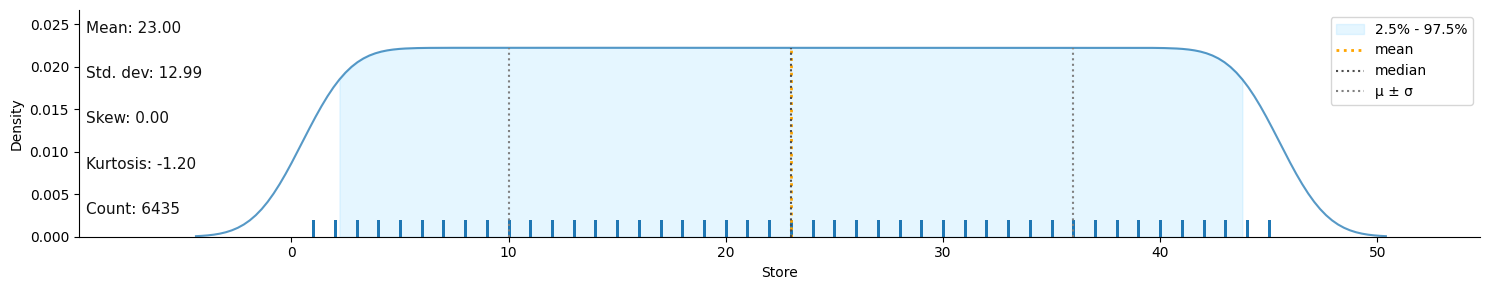

In [ ]:
import klib
klib.dist_plot(df)

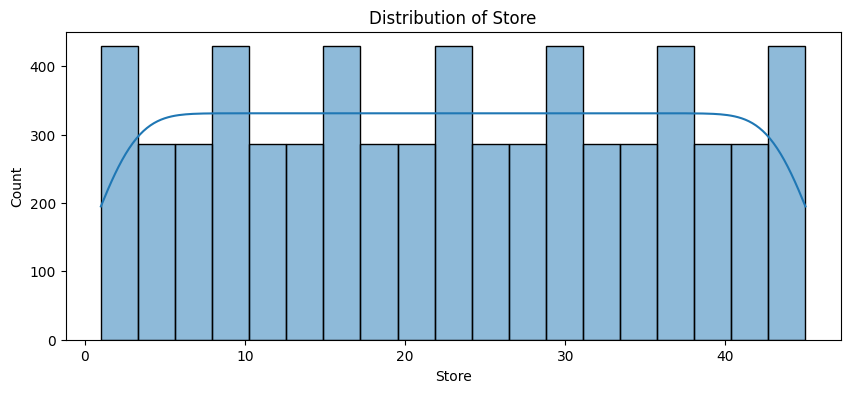

 
Skewness of Store: 0.0


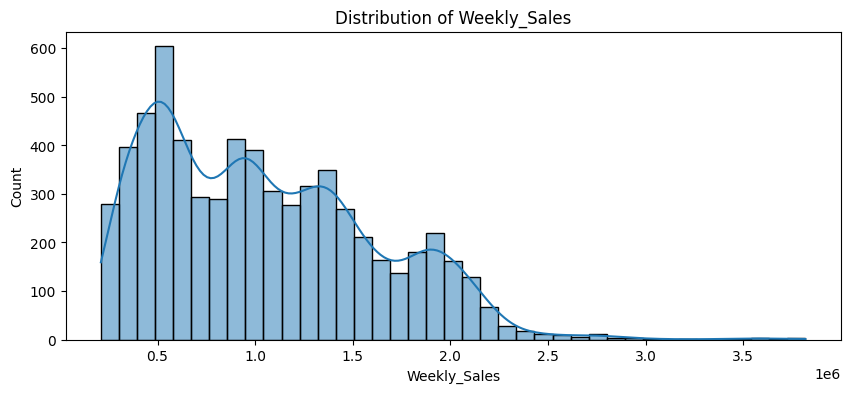

 
Skewness of Weekly_Sales: 0.6683617974864524


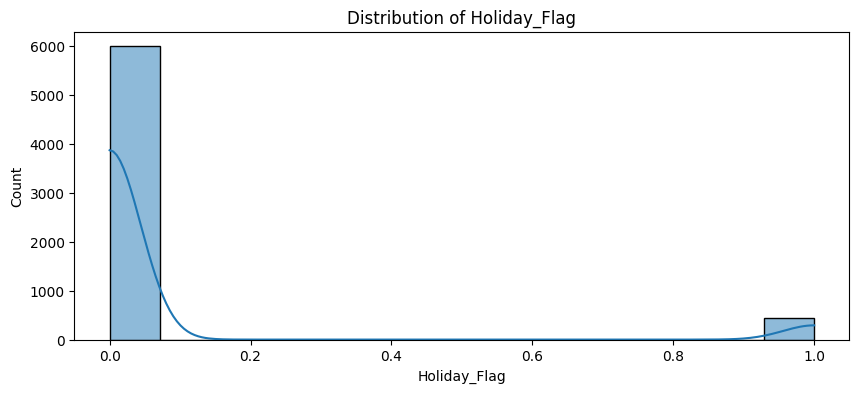

 
Skewness of Holiday_Flag: 3.3734986714578485


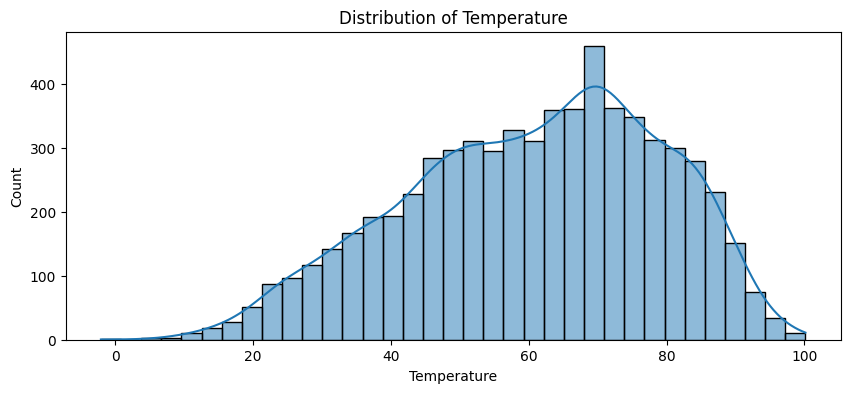

 
Skewness of Temperature: -0.3367676011075799


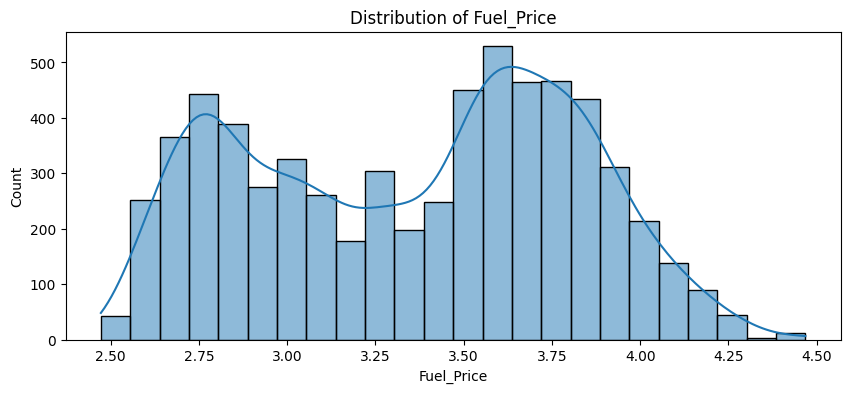

 
Skewness of Fuel_Price: -0.09615830011865549


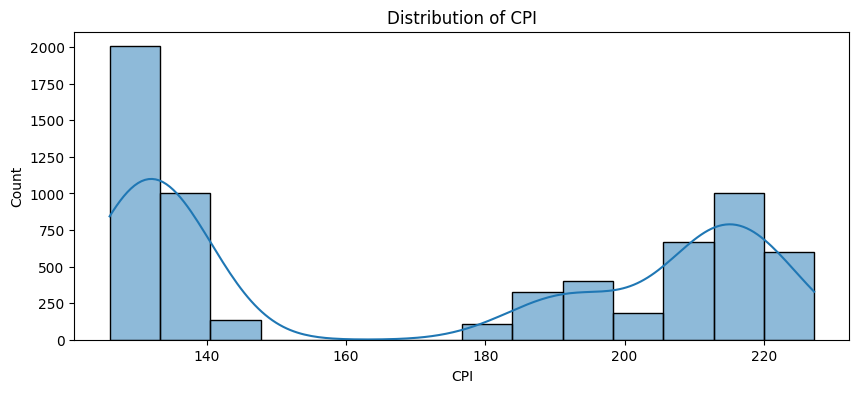

 
Skewness of CPI: 0.06349184988549494


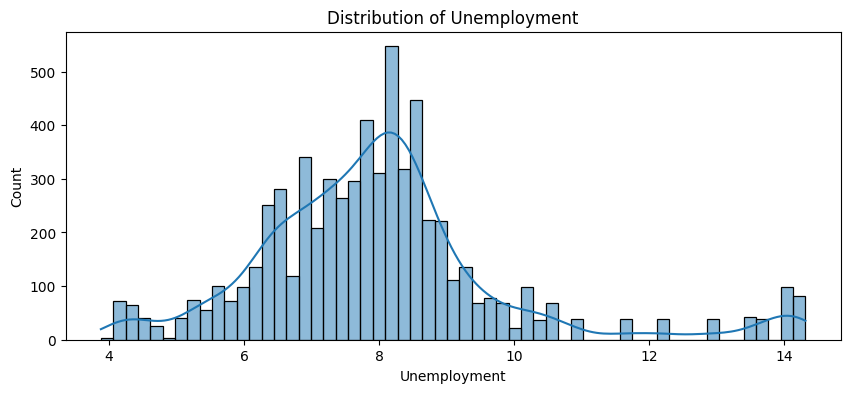

 
Skewness of Unemployment: 1.1881439334843265


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a new DataFrame with only the numeric columns leaving categorical ones out
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plotting the histograms for each numeric column
for col in numeric_df:
  plt.figure(figsize=(10, 4))
  sns.histplot(numeric_df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

  skewness = numeric_df[col].skew()
  print(" ")
  print(f"Skewness of {col}: {skewness}")


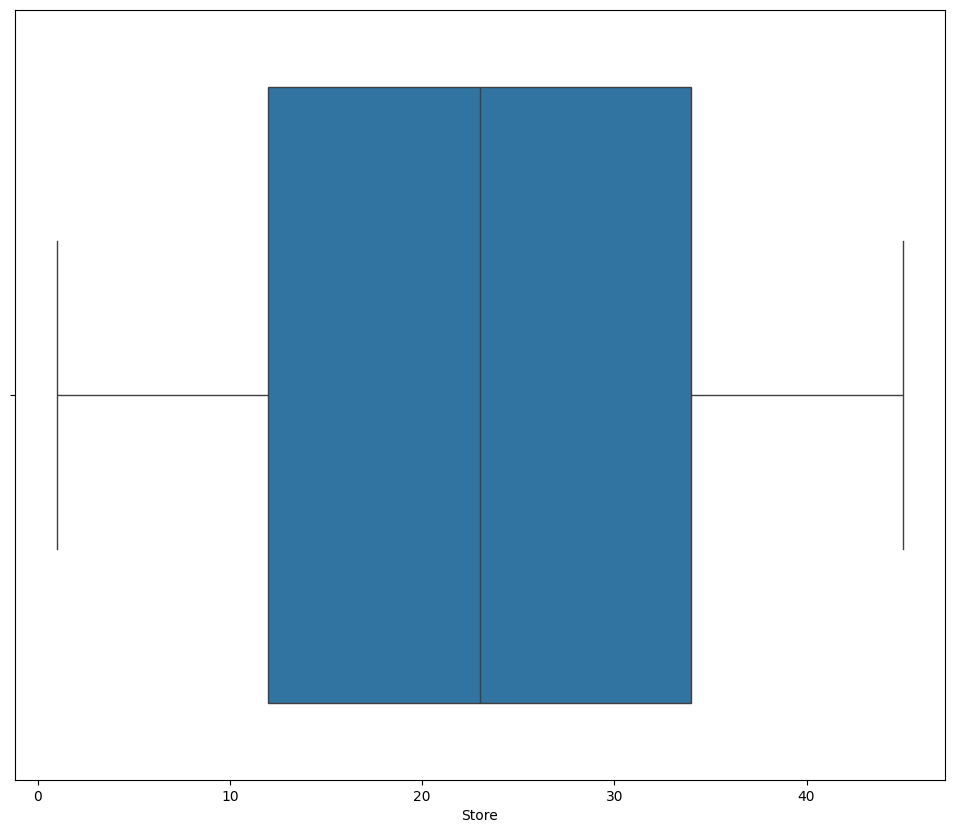

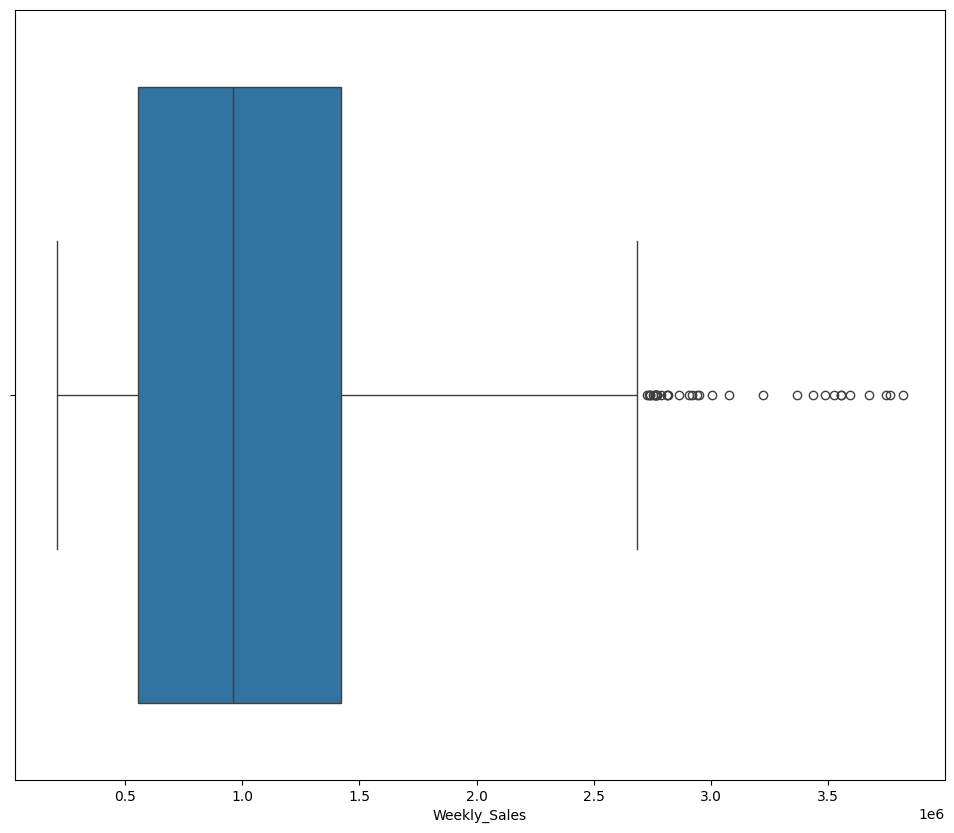

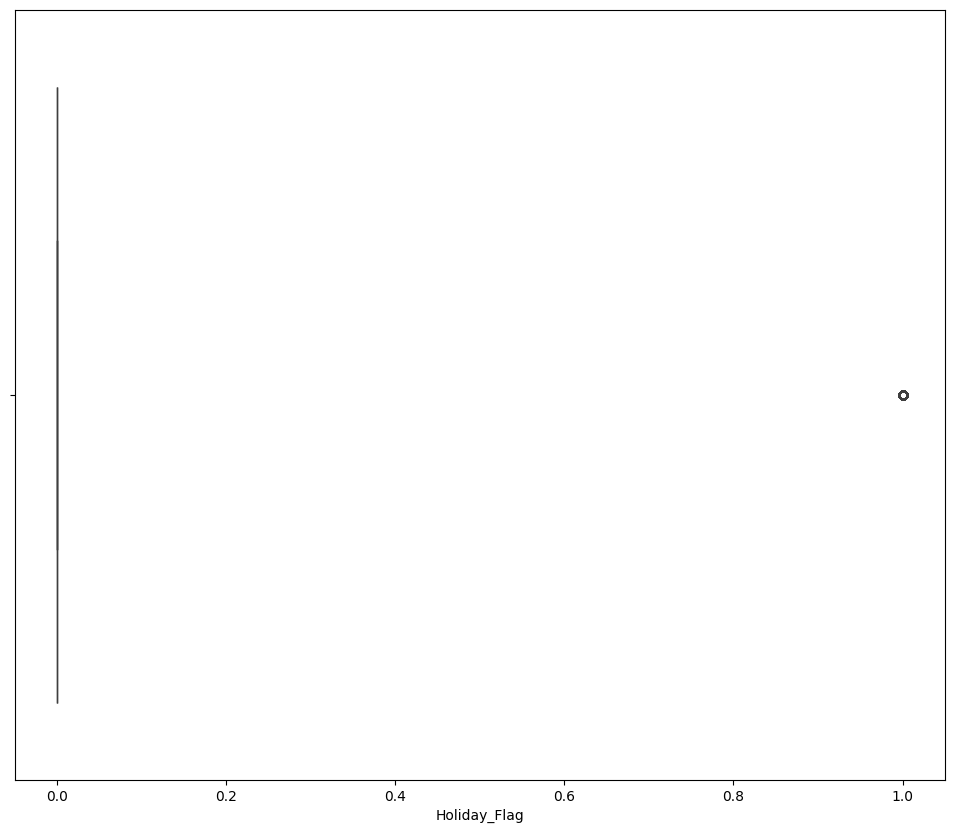

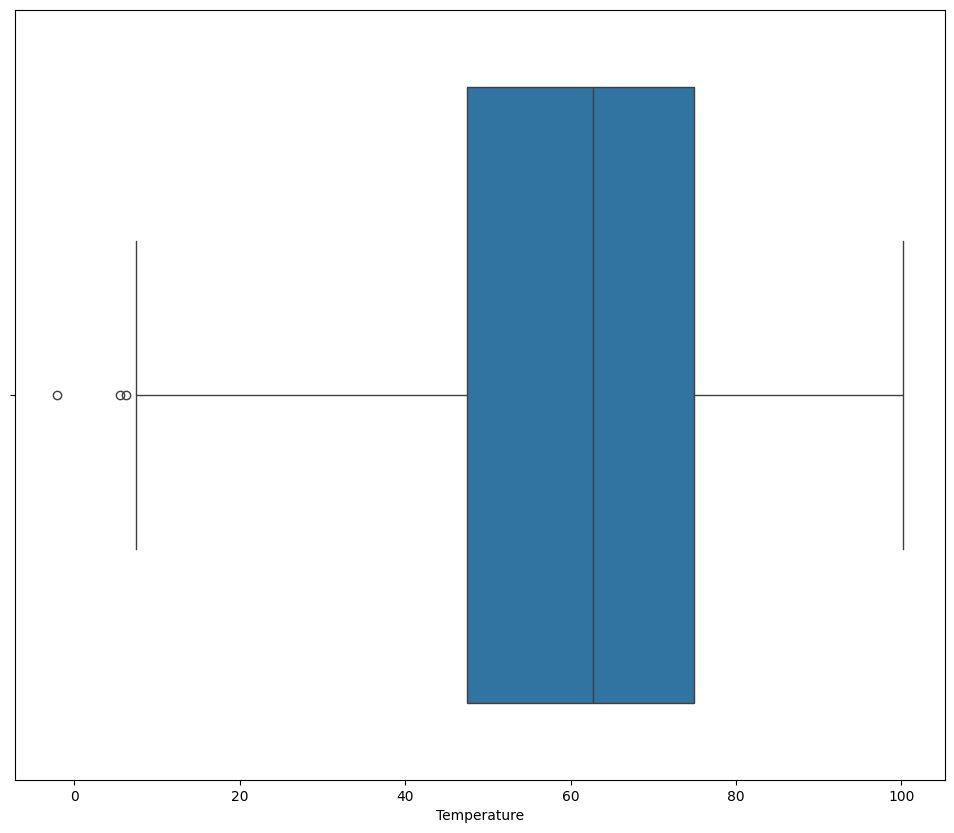

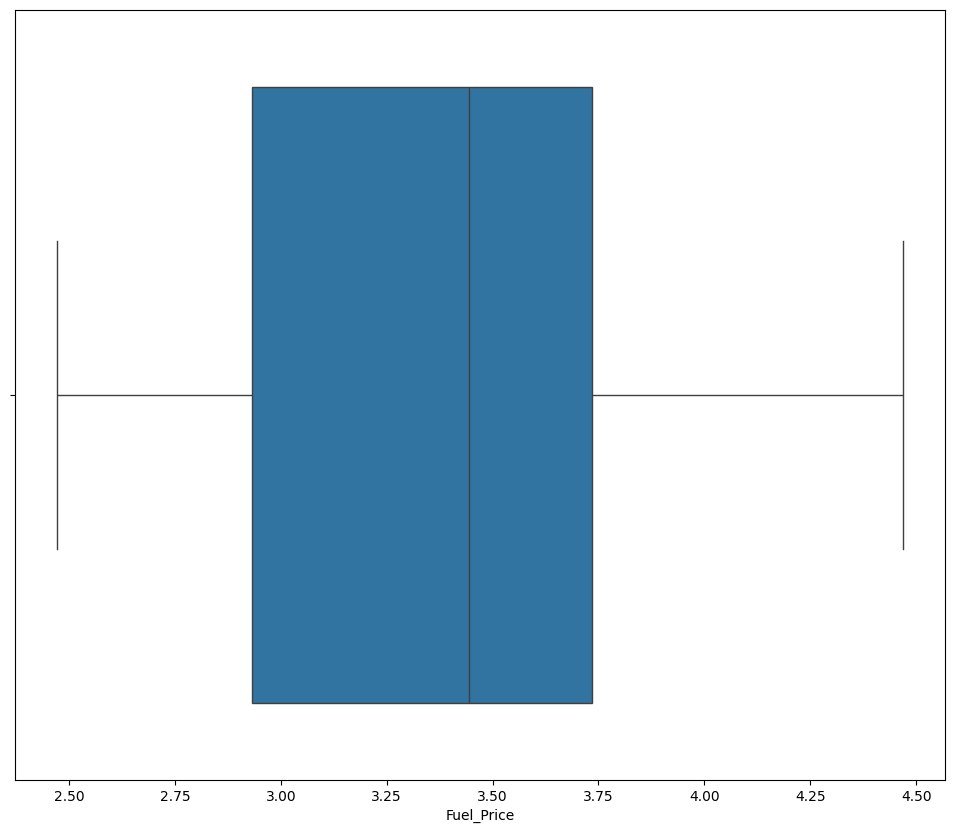

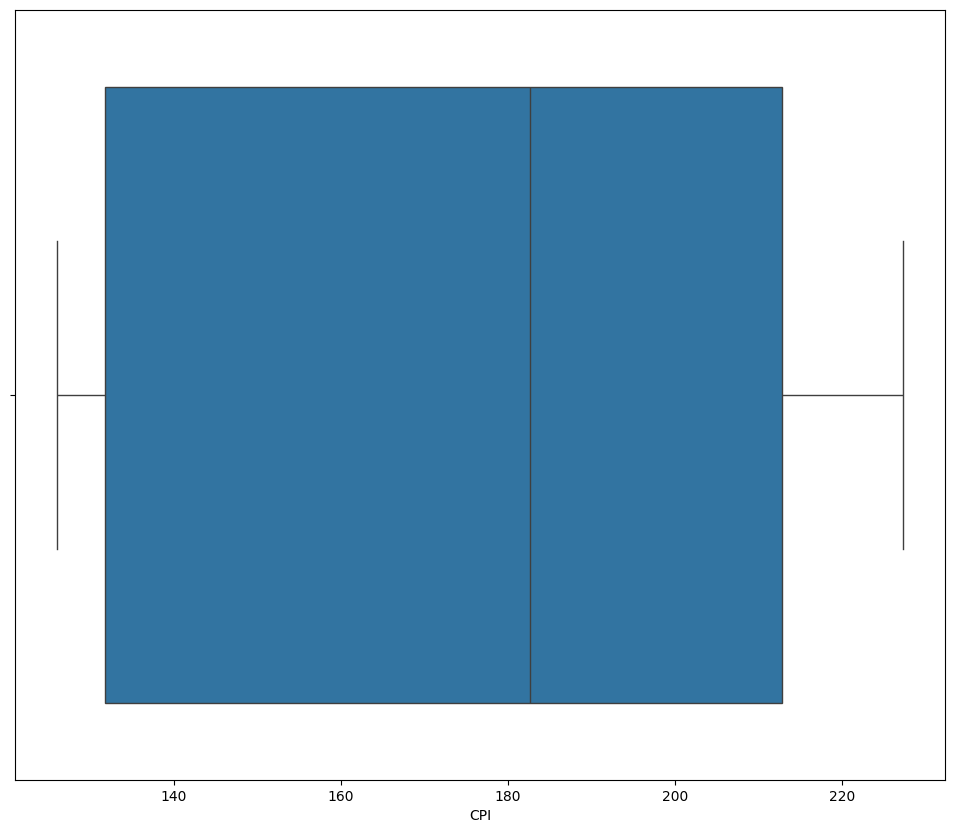

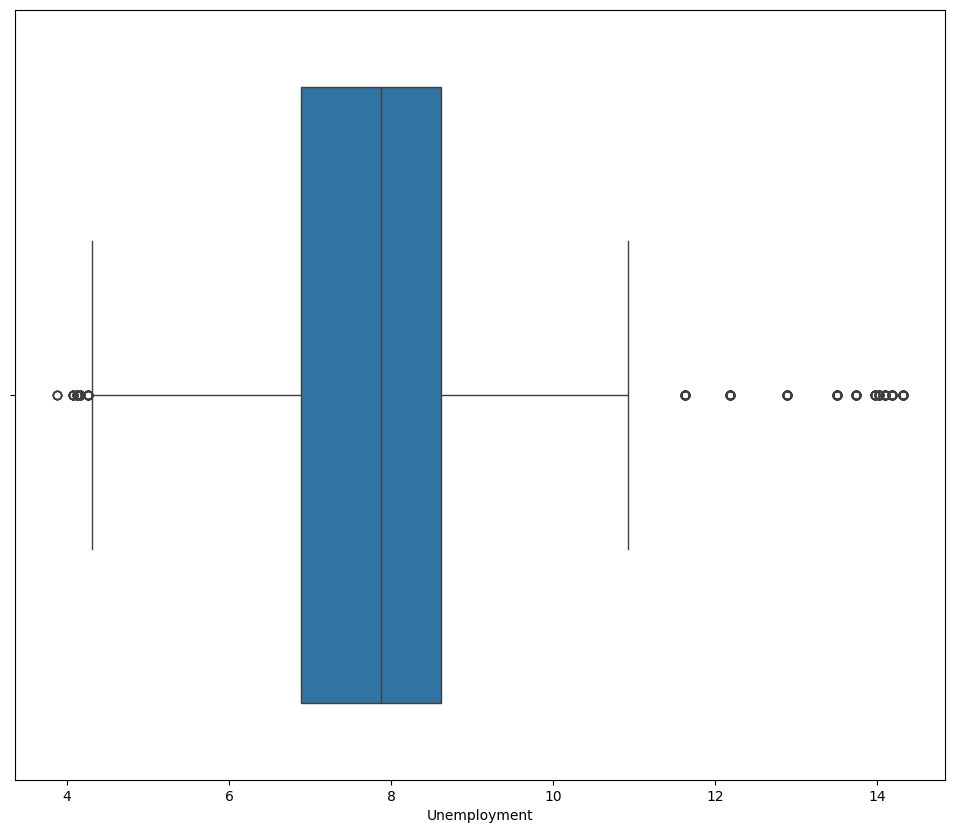

In [ ]:
# @title Outlier Detection

import seaborn as sns
import matplotlib.pyplot as plt

# plot
for col in df.select_dtypes(include=['number']):
    sns.boxplot(x=df[col])
    plt.show()


<Axes: xlabel='CPI', ylabel='Fuel_Price'>

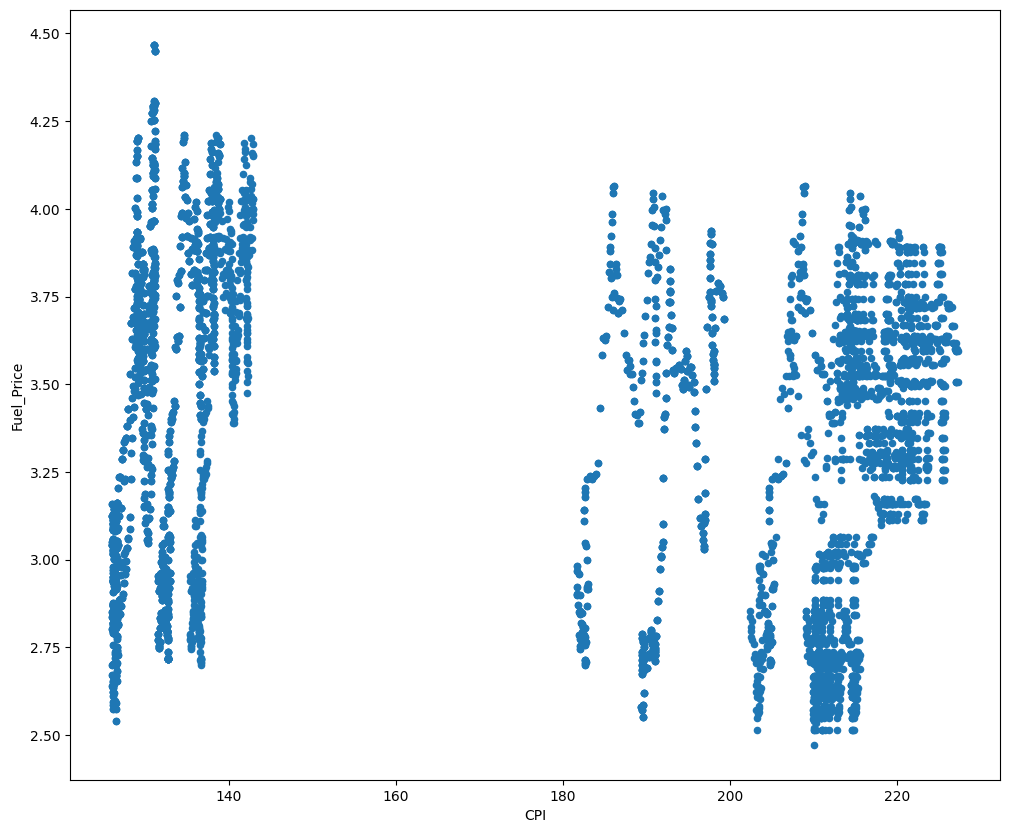

In [ ]:
# @title Fuel_Price vs CPI

df.plot.scatter(x='CPI', y='Fuel_Price')

<Axes: xlabel='Date'>

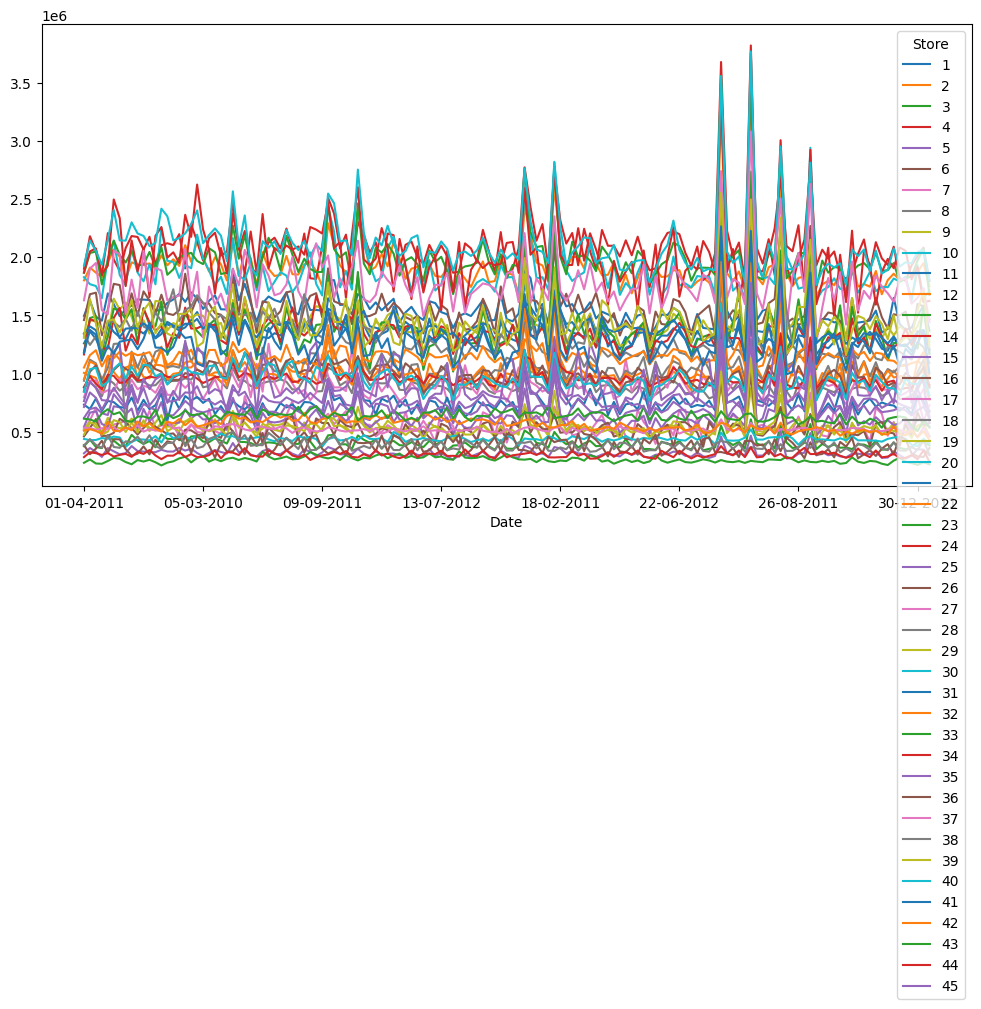

In [ ]:
# @title Average Weekly Sales by Store over Time

df.groupby(['Date', 'Store'])['Weekly_Sales'].mean().unstack().plot(figsize=(12, 6))

In [ ]:
# @title Change CPI per Week

import plotly.express as px
df_3 = df.groupby('Date')[['CPI']].sum()

fig = px.line(df_3, x=df_3.index, y=df_3['CPI'], title='change CPI per week')
fig.show()

<Axes: xlabel='Date'>

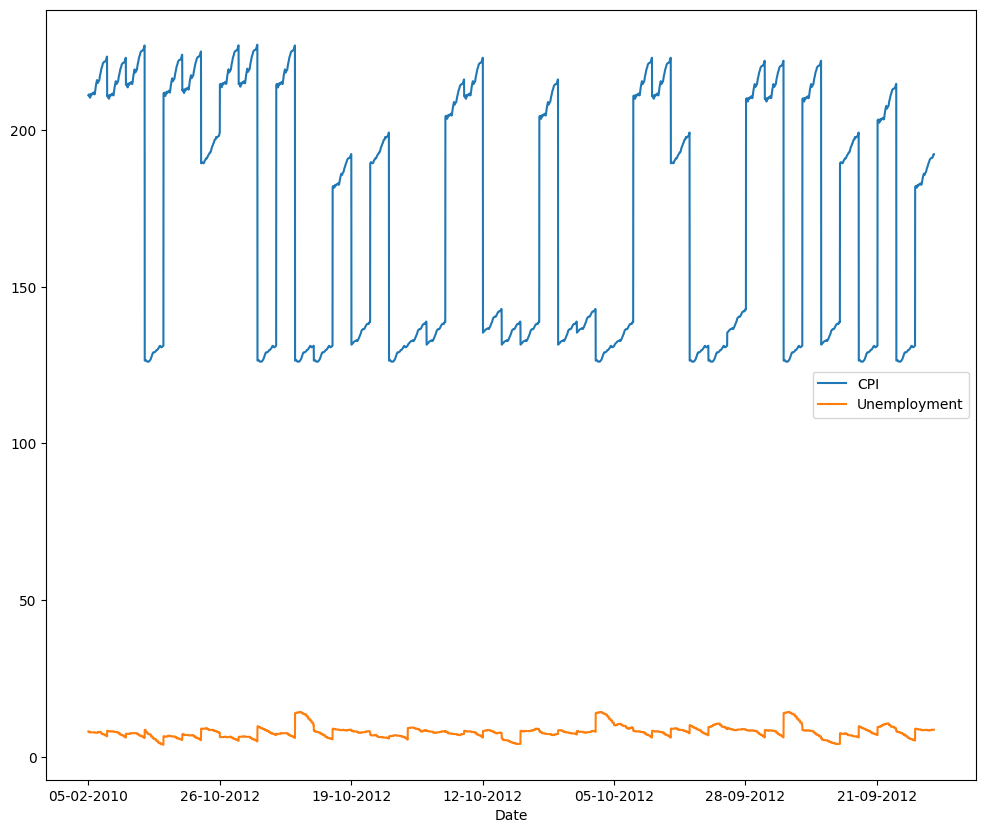

In [ ]:
# @title CPI vs Unemployment over Time

df.plot(x='Date', y=['CPI', 'Unemployment'])

In [ ]:
# @title Unemployement vs weekly_sales in stores

plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Unemployment", color="Store",
                 title="Relation between Unemployment and weeklysales within stores" , color_continuous_scale=px.colors.sequential.Viridis)

fig.show()

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Date'>

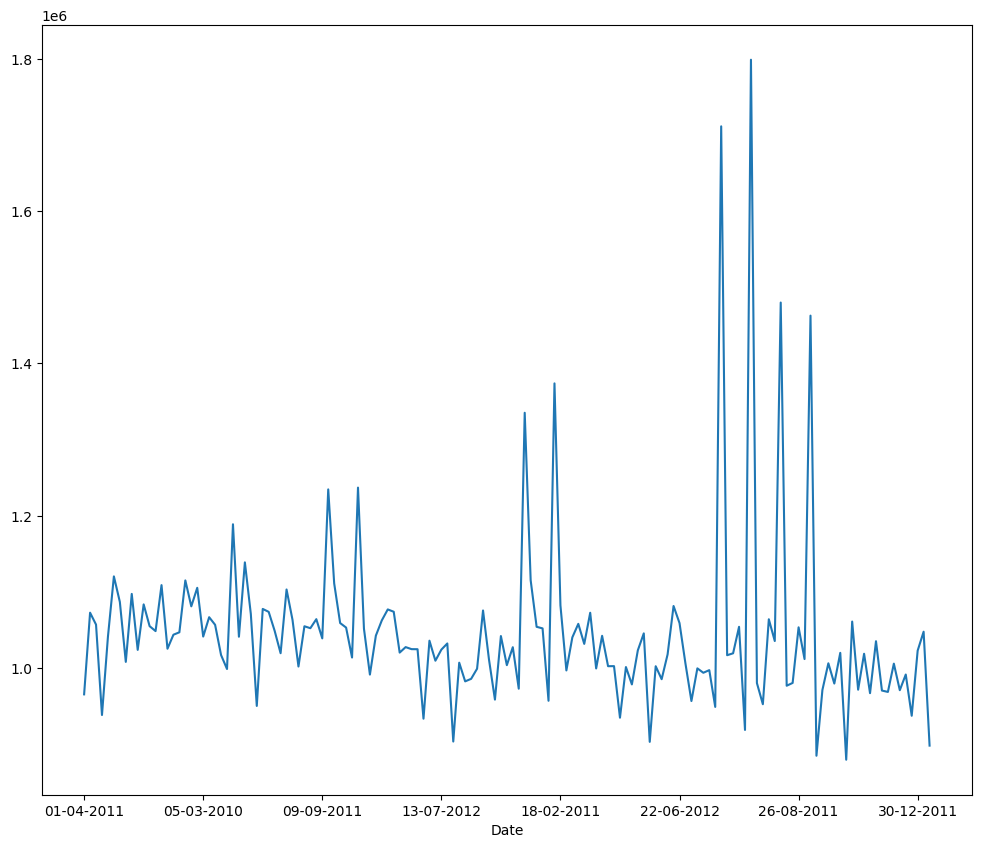

In [ ]:
# @title Average Weekly Sales over Time

df.groupby('Date')['Weekly_Sales'].mean().plot()

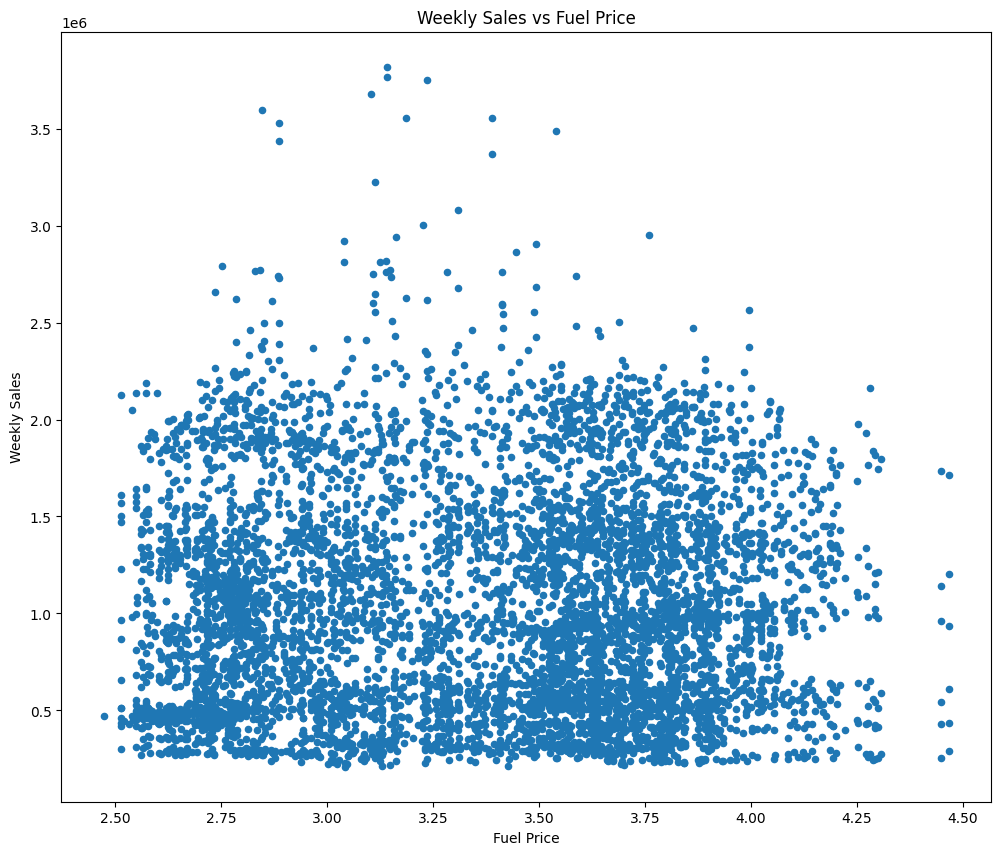

In [ ]:
# prompt: weekly_sales vs fuel price graph

import matplotlib.pyplot as plt
df.plot.scatter(x='Fuel_Price', y='Weekly_Sales')
plt.title('Weekly Sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:
# @title weekly_sales vs fuel price graph

import pandas as pd
import plotly.express as px

df = pd.read_csv("/walmart-sales-dataset-of-45stores.csv")

fig = px.scatter(df, x="Fuel_Price", y="Weekly_Sales", title="Weekly Sales vs Fuel Price")

fig.show()


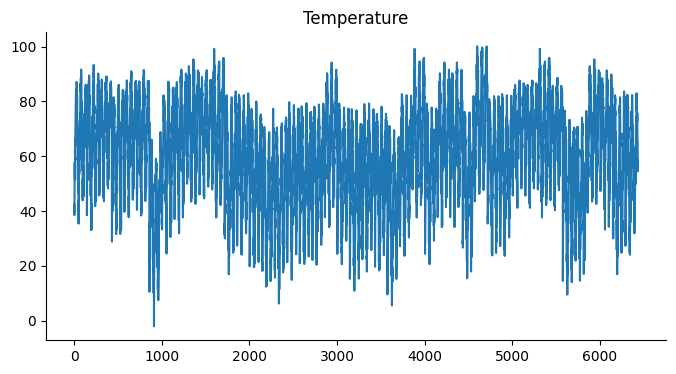

In [ ]:
# @title Temperature

from matplotlib import pyplot as plt
df['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# @title weekly_sales vs Temperature

plt.figure(figsize = (20,5))
fig = px.scatter(df, x="Weekly_Sales", y="Temperature", color="Store",
                 title="Relation between Temperature and weeklysales within stores")

fig.show()

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='Store'>

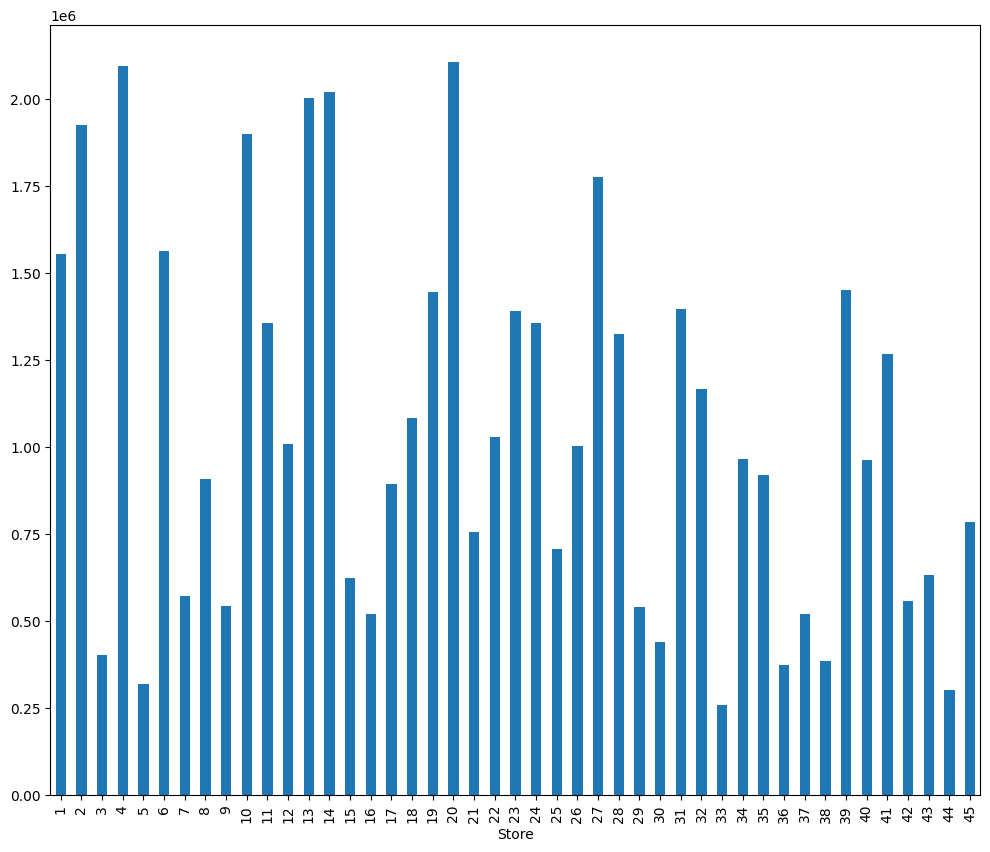

In [ ]:
# @title Average Weekly Sales by Store

df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')

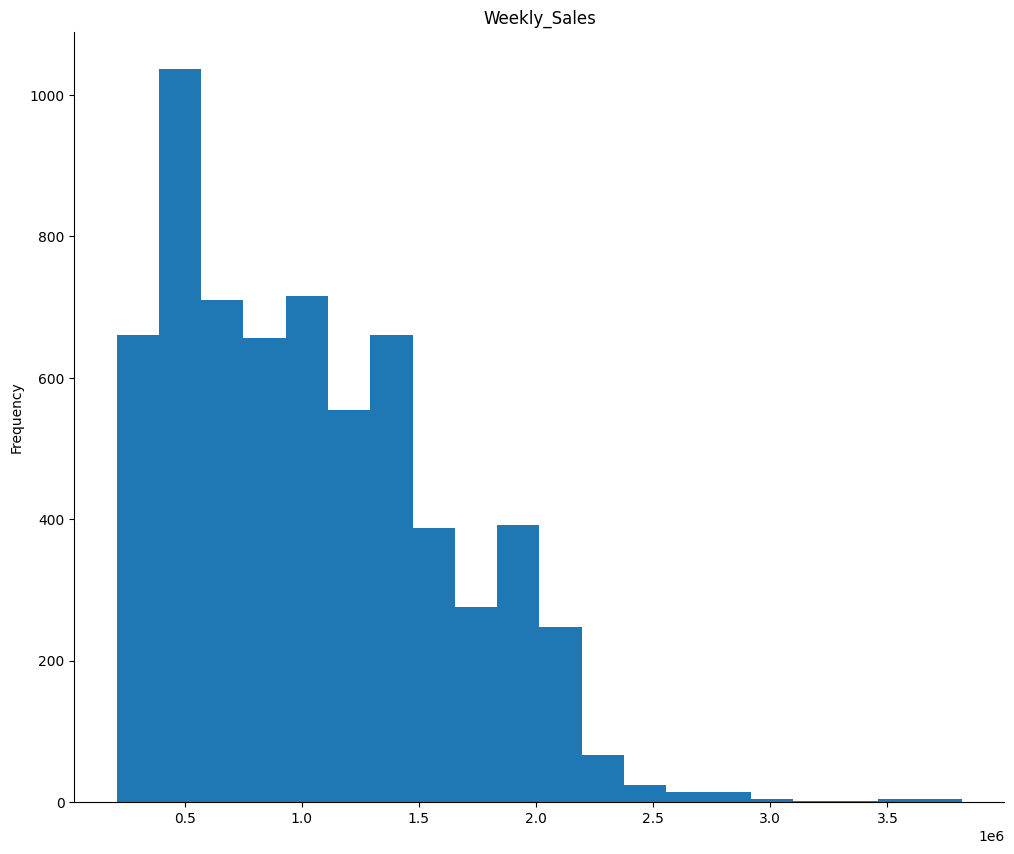

In [ ]:
# @title Weekly_Sales

from matplotlib import pyplot as plt
df['Weekly_Sales'].plot(kind='hist', bins=20, title='Weekly_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

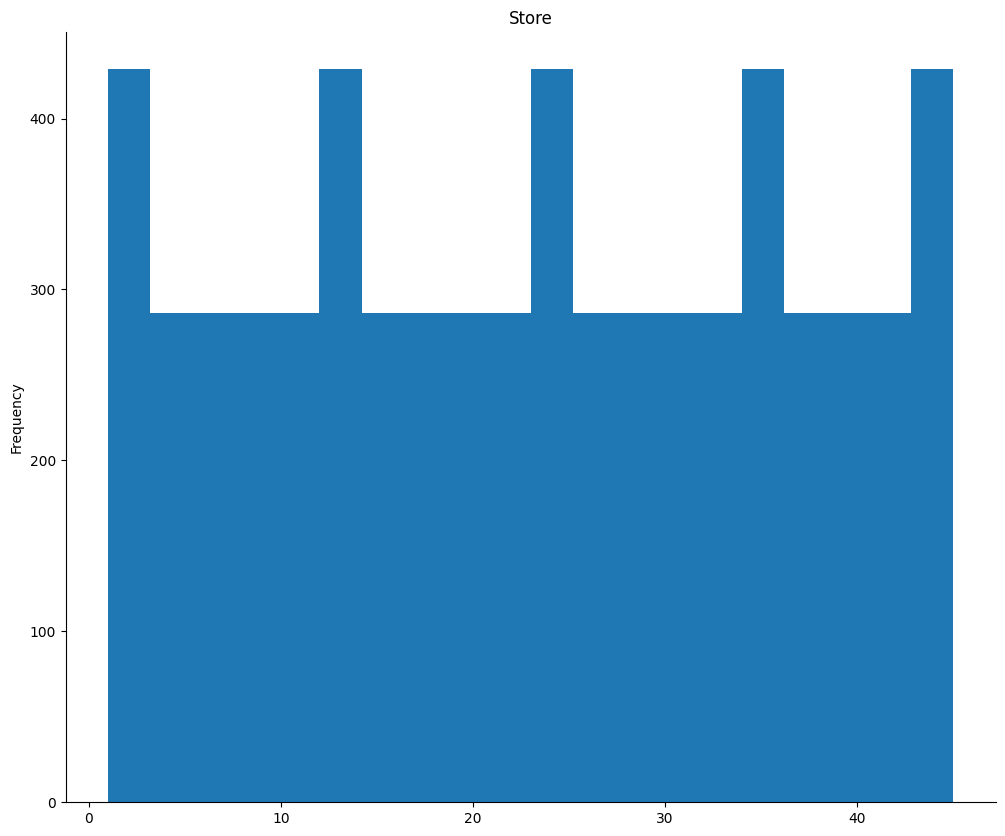

In [ ]:
# @title Store

from matplotlib import pyplot as plt
df['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title weekly_sales vs holiday_flag

import plotly.express as px
plt.figure(figsize = (20,5))

fig = px.strip(df, x="Weekly_Sales", y="Holiday_Flag", orientation="h", color="Store" , title = 'relation between weekly sales and holiday_flag')
fig.show()

<Figure size 2000x500 with 0 Axes>

In [ ]:
df[df['Holiday_Flag']==0]['Date'].value_counts()

05-02-2010    45
28-10-2011    45
24-02-2012    45
17-02-2012    45
03-02-2012    45
              ..
19-11-2010    45
12-11-2010    45
05-11-2010    45
29-10-2010    45
26-10-2012    45
Name: Date, Length: 133, dtype: int64

In [ ]:
df[df['Holiday_Flag']==1]['Date'].value_counts()

12-02-2010    45
10-09-2010    45
26-11-2010    45
31-12-2010    45
11-02-2011    45
09-09-2011    45
25-11-2011    45
30-12-2011    45
10-02-2012    45
07-09-2012    45
Name: Date, dtype: int64

 Since that holidays are considered to be national holidays so they don't depend on state but they depend on the country therefore for all stores in all states holidays are the same for the same date

<ipython-input-89-b75bf0c2c161>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



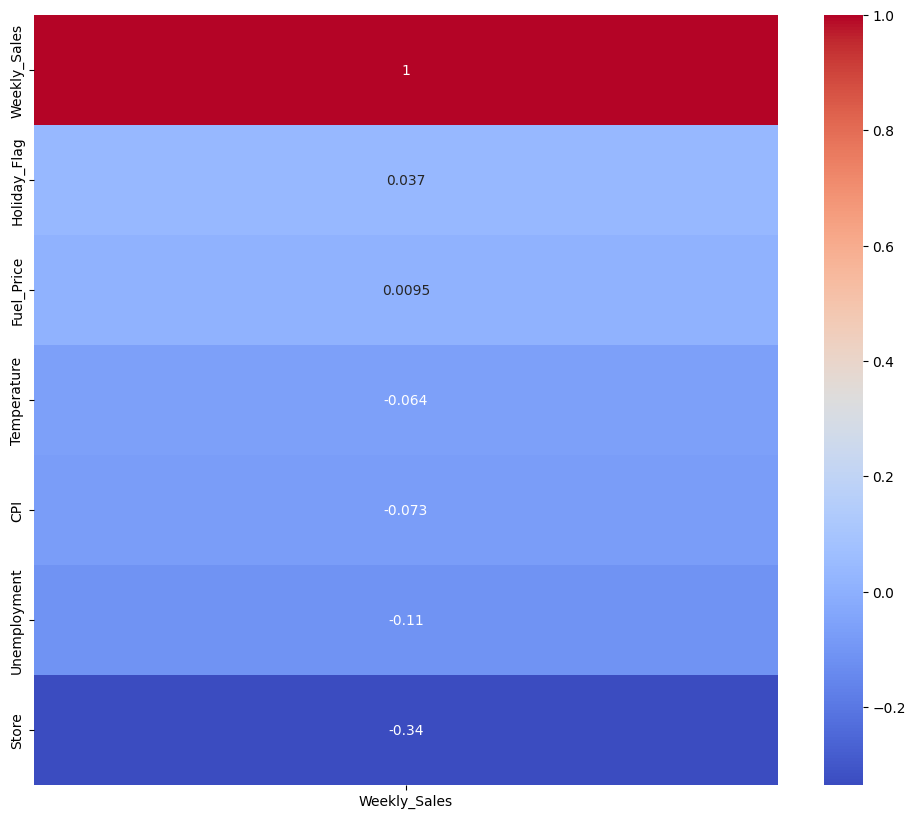

In [ ]:
# @title Pearson Correlation graph for weekly sales vs all columns in df

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculating the Pearson correlation coefficient between Weekly_Sales and all other columns
correlation_matrix = df.corr()['Weekly_Sales'].sort_values(ascending=False)

# Creating a heatmap of the correlation matrix from above
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm')
plt.show()


**Time Series Analysis and Decomposition**

---



In [ ]:
Sales = df.groupby(['Date'])[['Weekly_Sales']].sum()

<Axes: xlabel='Date'>

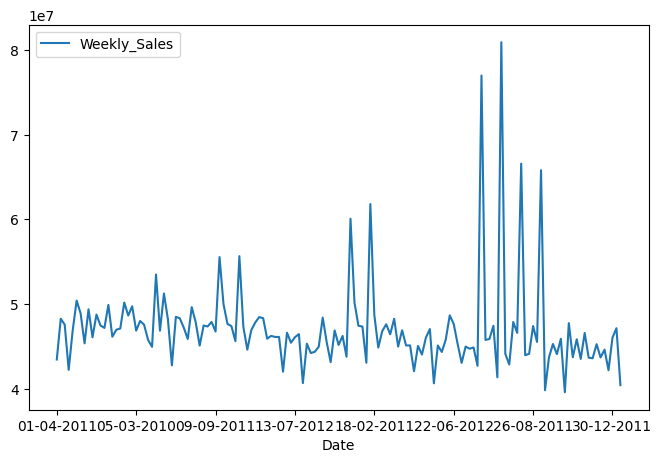

In [ ]:
Sales.plot(figsize=(8,5))

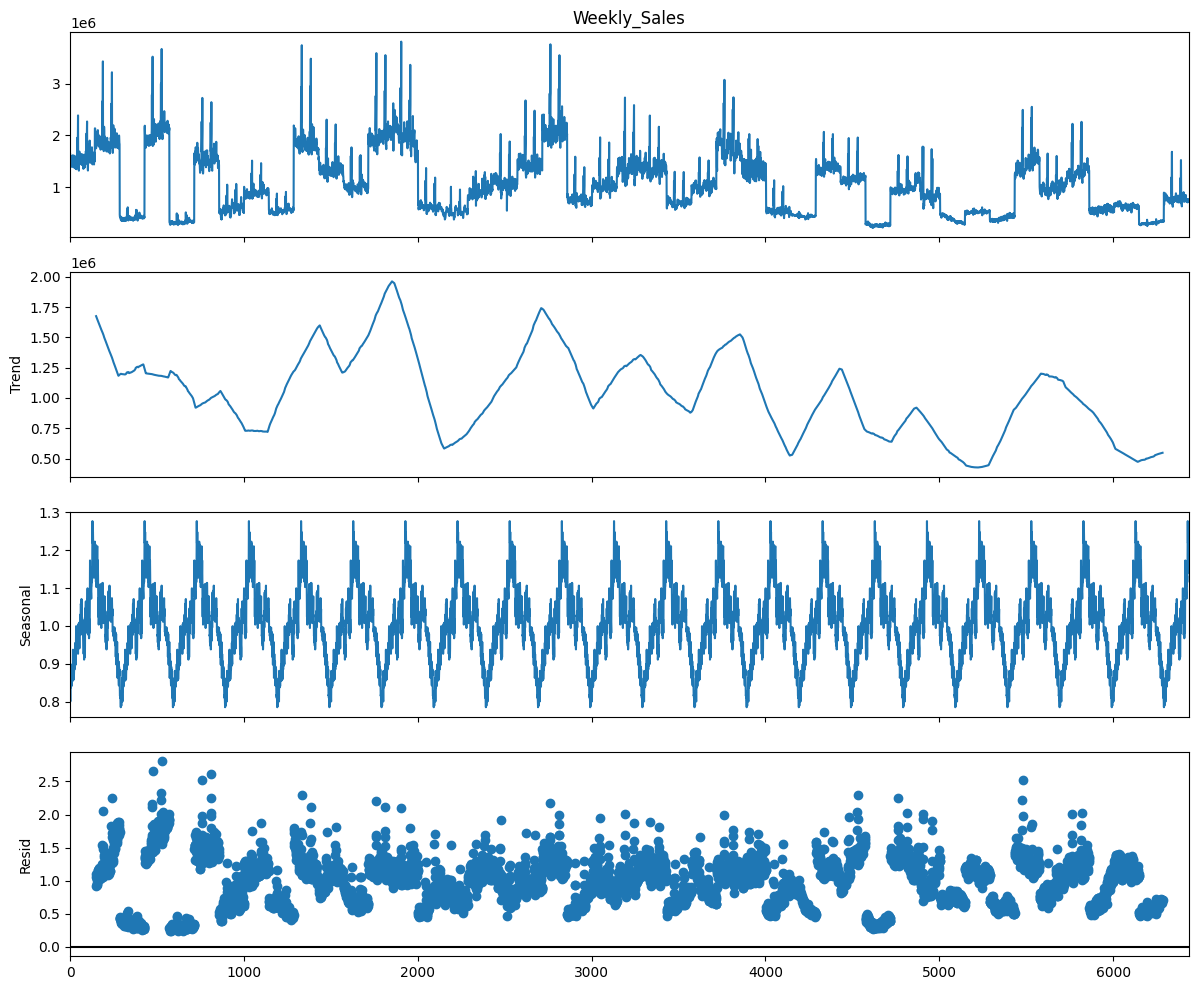

In [ ]:
# @title Multiplicative Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

multiplicative_decomposition = seasonal_decompose(df['Weekly_Sales'], model='multiplicative', period=300)

plt.rcParams.update({'figure.figsize': (12,10)})
multiplicative_decomposition.plot()
plt.show()

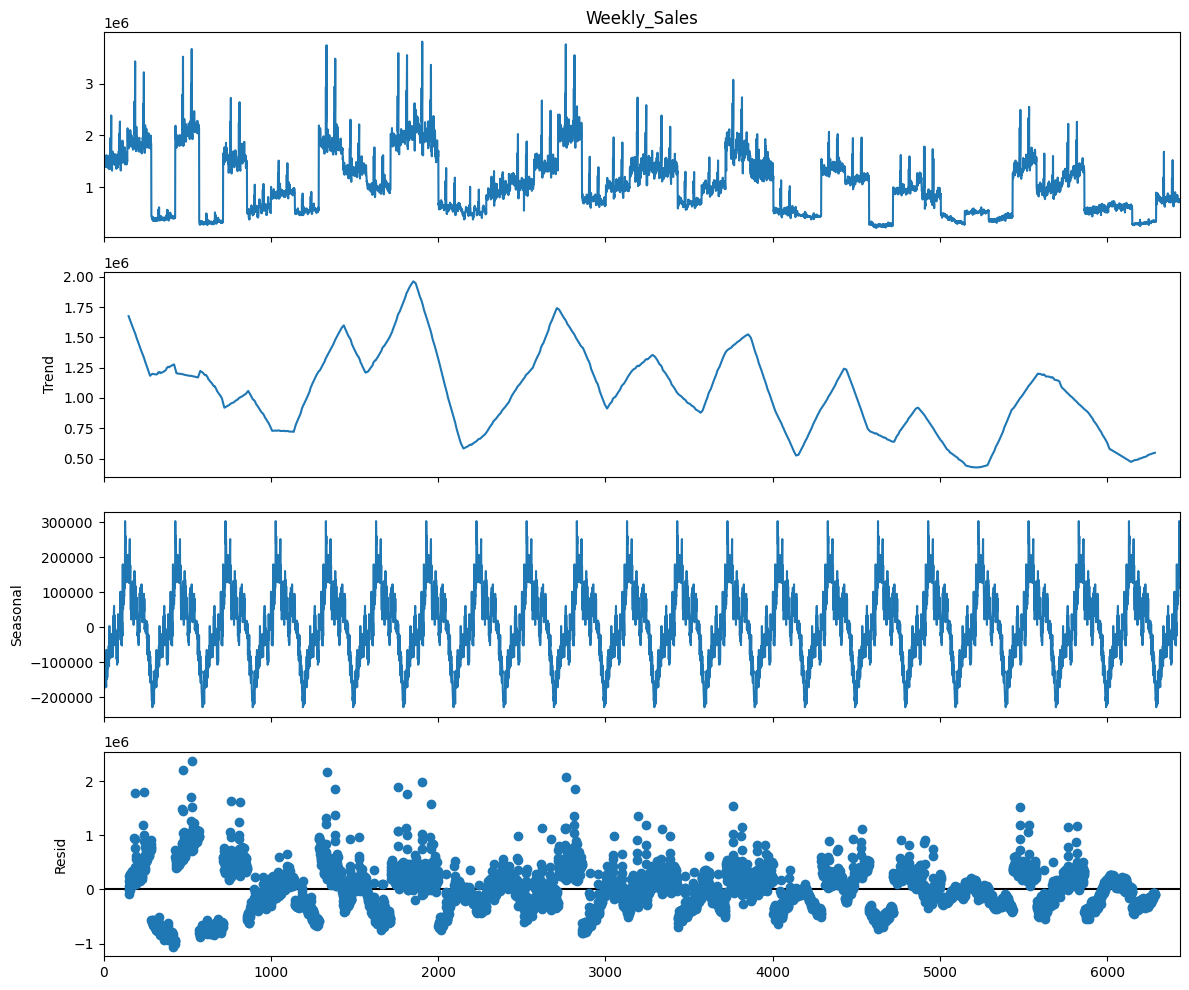

In [ ]:
# @title Additive Decomposition
additive_decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=300)

plt.rcParams.update({'figure.figsize': (12,10)})
additive_decomposition.plot()
plt.show()

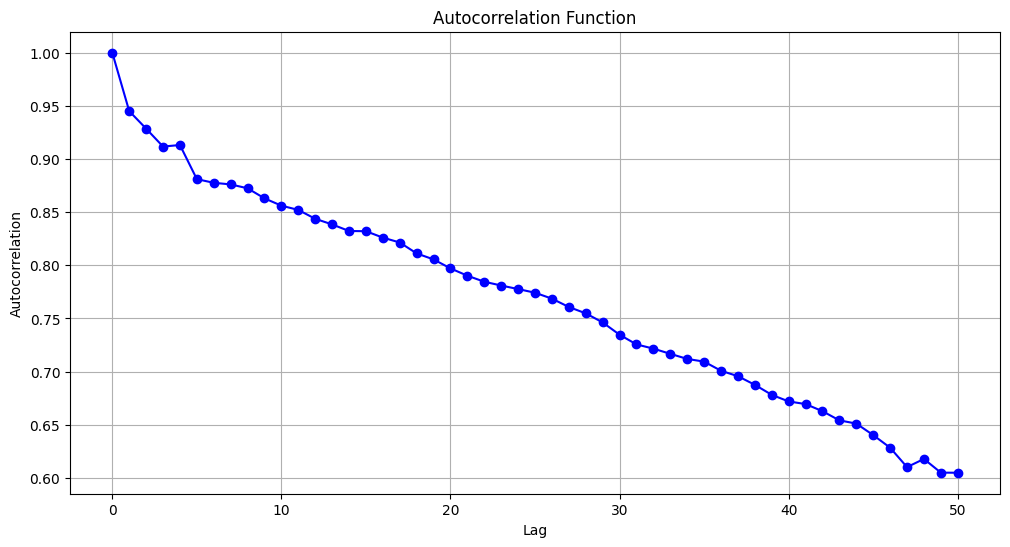

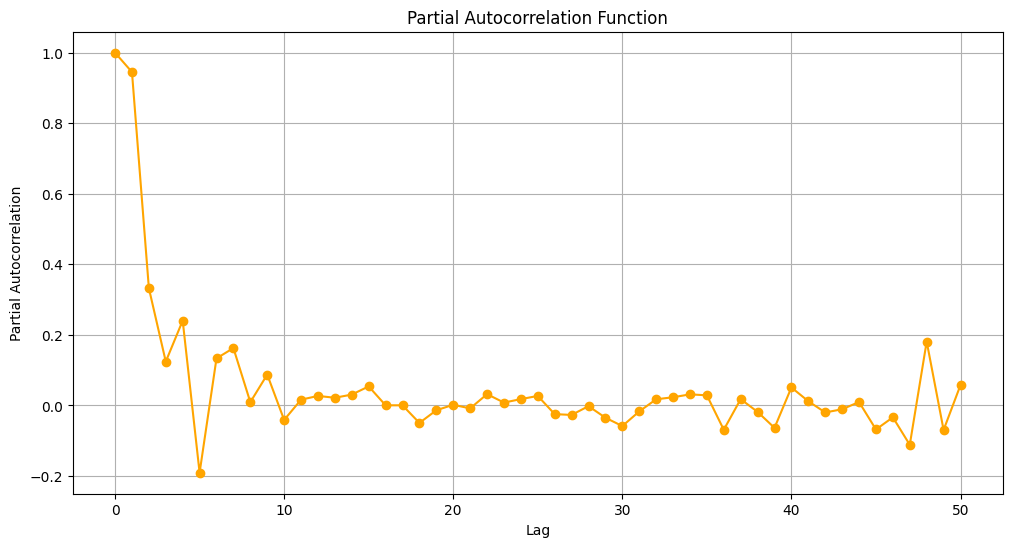

In [ ]:
# @title Time Series Analysis Plotting acf and autocorrelation plots

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Calculating the autocorrelation and partial autocorrelation functions
acf_values = acf(df['Weekly_Sales'], nlags=50)
pacf_values = pacf(df['Weekly_Sales'], nlags=50)

# Plotting the autocorrelation function
plt.figure(figsize=(12, 6))
plt.plot(acf_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()

# Partial autocorrelation function
plt.figure(figsize=(12, 6))
plt.plot(pacf_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.grid(True)
plt.show()


ADF Statistic: -4.62
p-value: 0.0001


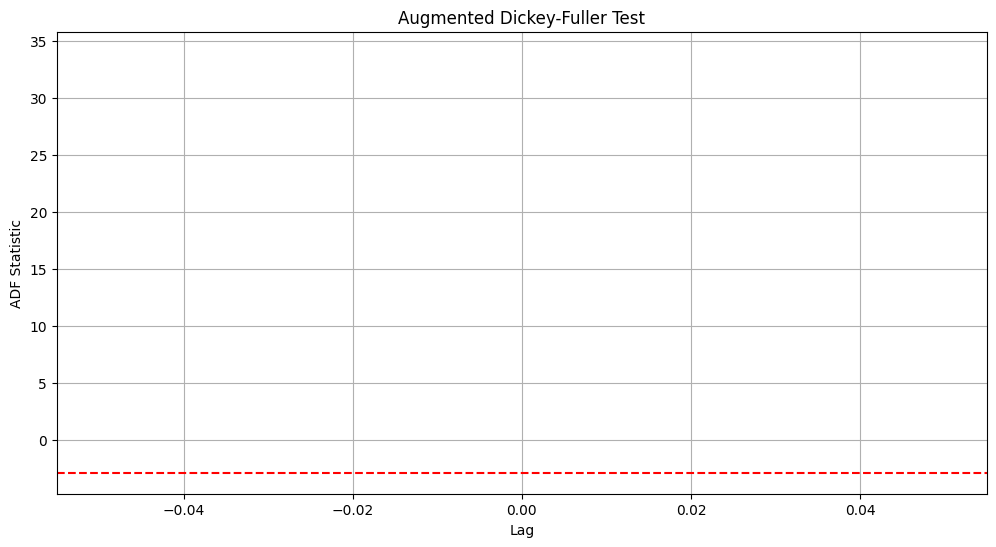

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test
adf_result = adfuller(df['Weekly_Sales'])
print(f"ADF Statistic: {adf_result[0]:.2f}")
print(f"p-value: {adf_result[1]:.4f}")

# Augmented Dickey-Fuller Test
plt.figure(figsize=(12, 6))
plt.plot(adf_result[2], color='blue')
plt.axhline(y=adf_result[4]['5%'], color='red', linestyle='--')
plt.title('Augmented Dickey-Fuller Test')
plt.xlabel('Lag')
plt.ylabel('ADF Statistic')
plt.grid(True)
plt.show()


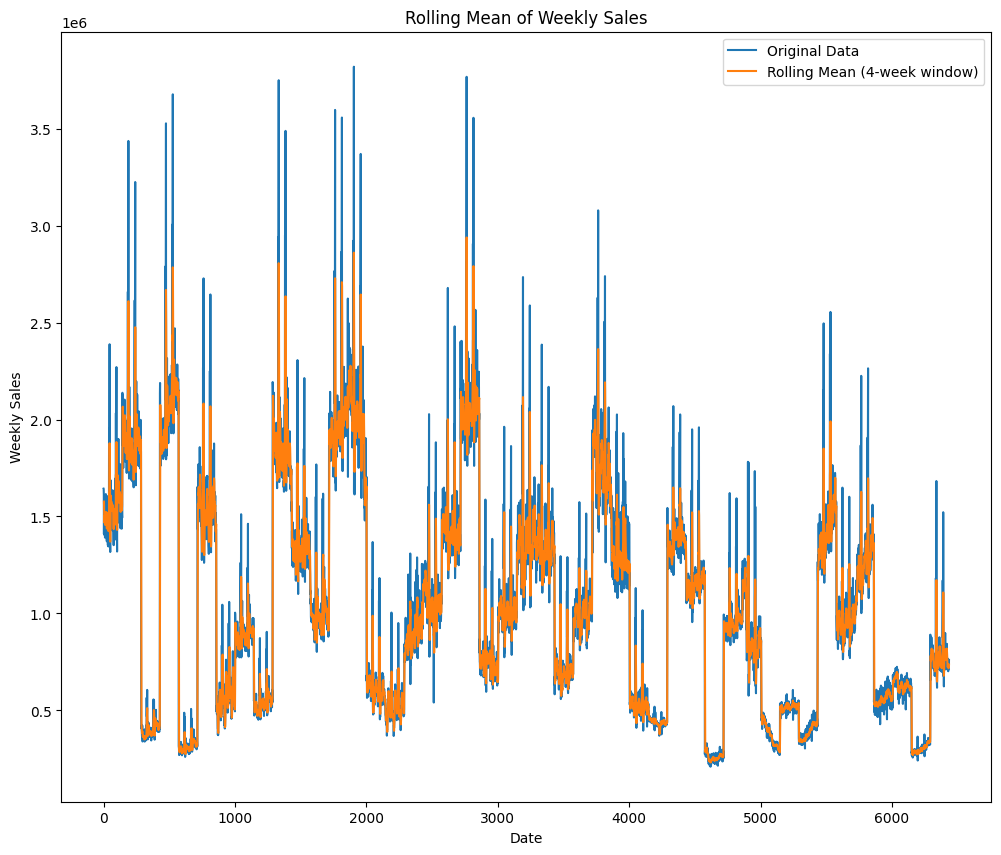

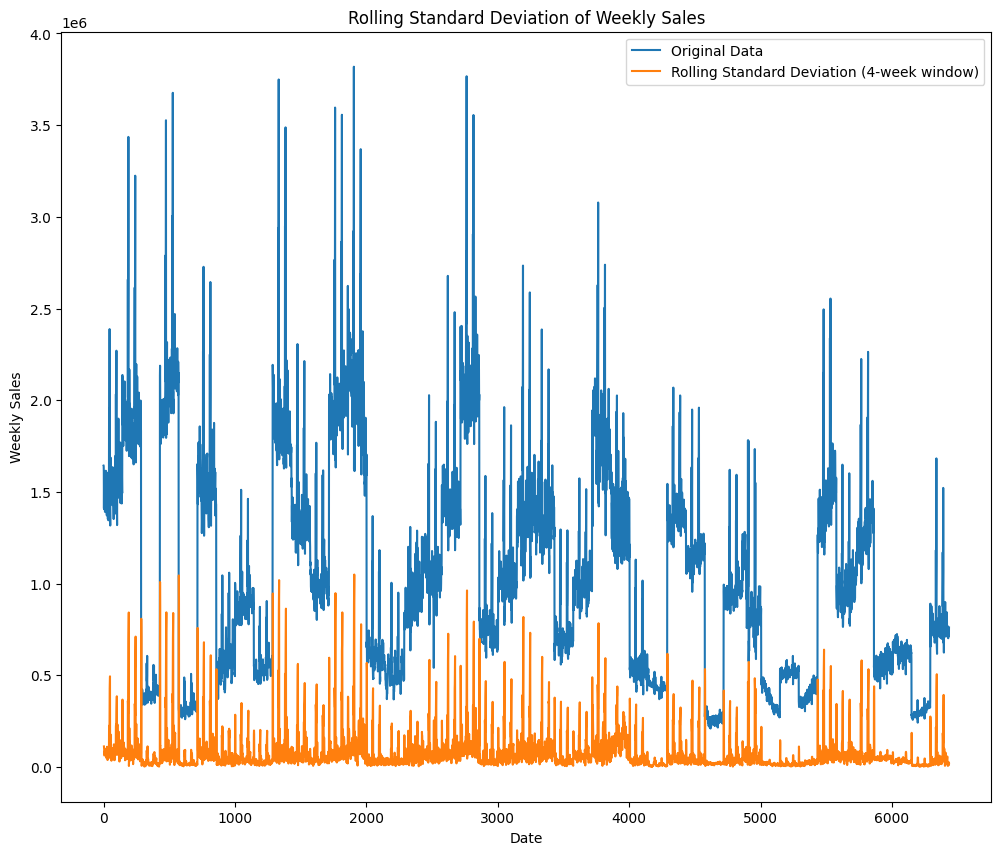

In [ ]:
# @title Rolling Statistics

import matplotlib.pyplot as plt
# Calculating the rolling mean of Weekly_Sales over a 4-week window
rolling_mean = df['Weekly_Sales'].rolling(window=4).mean()

plt.plot(df['Weekly_Sales'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean (4-week window)')
plt.title('Rolling Mean of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Calculating the rolling standard deviation of Weekly_Sales over a 4-week window
rolling_std = df['Weekly_Sales'].rolling(window=4).std()

plt.plot(df['Weekly_Sales'], label='Original Data')
plt.plot(rolling_std, label='Rolling Standard Deviation (4-week window)')
plt.title('Rolling Standard Deviation of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


### **Time Series Description:**

---



The time series analysis of the dataset reveals several important characteristics of weekly sales patterns:

**Trend**: Upon examination of the aggregated weekly sales over the two-year period, the data do not exhibit a long-term increasing or decreasing trend. Sales figures oscillate around a consistent level without showing a clear directional movement over time.

**Seasonality**: The decomposition of the time series indicates a pronounced seasonal pattern. This is characterized by regular peaks and troughs that suggest higher sales activity during certain periods of the year, likely aligning with national holidays, festive seasons, or periodic sales events.

**Residuals**: The residual component of the decomposition indicates variability that is not explained by seasonality or trend. These irregular fluctuations could be due to random influences or external variables not captured by the initial time series model.

**Stationarity**: The results of the Augmented Dickey-Fuller (ADF) test suggest that the time series is non-stationary. The ADF statistic does not fall below the critical value threshold, indicating the presence of a unit root in the series. Non-stationarity is corroborated by visible seasonal patterns and sporadic spikes, which represent fluctuations in the mean over time.

**Outliers**: There are conspicuous spikes in the weekly sales data, much higher than the average levels, which could represent periods of promotional campaigns or holiday shopping frenzies that significantly drive up sales. These outliers must be taken into account when modeling, as they can influence the accuracy of forecasts.

In light of these observations, the time series presents a complex combination of seasonality, non-stationarity, and irregularities that must be addressed in the forecasting model.

## Modeling

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
sales=df.groupby("Date")[["Weekly_Sales"]].sum()
sales

,Weekly_Sales
Date,
2010-02-05,49750740
2010-02-12,48336678
2010-02-19,48276994
2010-02-26,43968571
2010-03-05,46871470
...,...
2012-09-28,43734899
2012-10-05,47566639
2012-10-12,46128514


<Axes: xlabel='Date'>

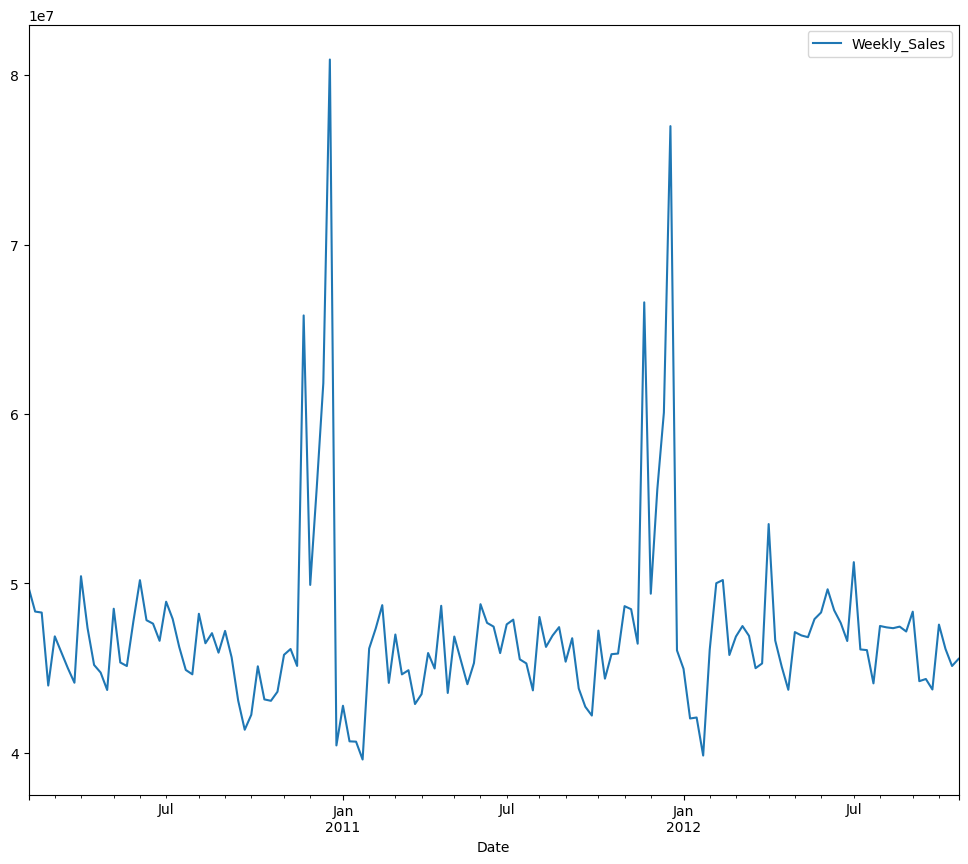

In [ ]:
sales.plot()

In [ ]:
df_weekly = sales['Weekly_Sales'].resample('1w').mean()
df_weekly

Date
2010-02-07   49750740
2010-02-14   48336678
2010-02-21   48276994
2010-02-28   43968571
2010-03-07   46871470
               ...   
2012-09-30   43734899
2012-10-07   47566639
2012-10-14   46128514
2012-10-21   45122411
2012-10-28   45544116
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

<Axes: xlabel='Date'>

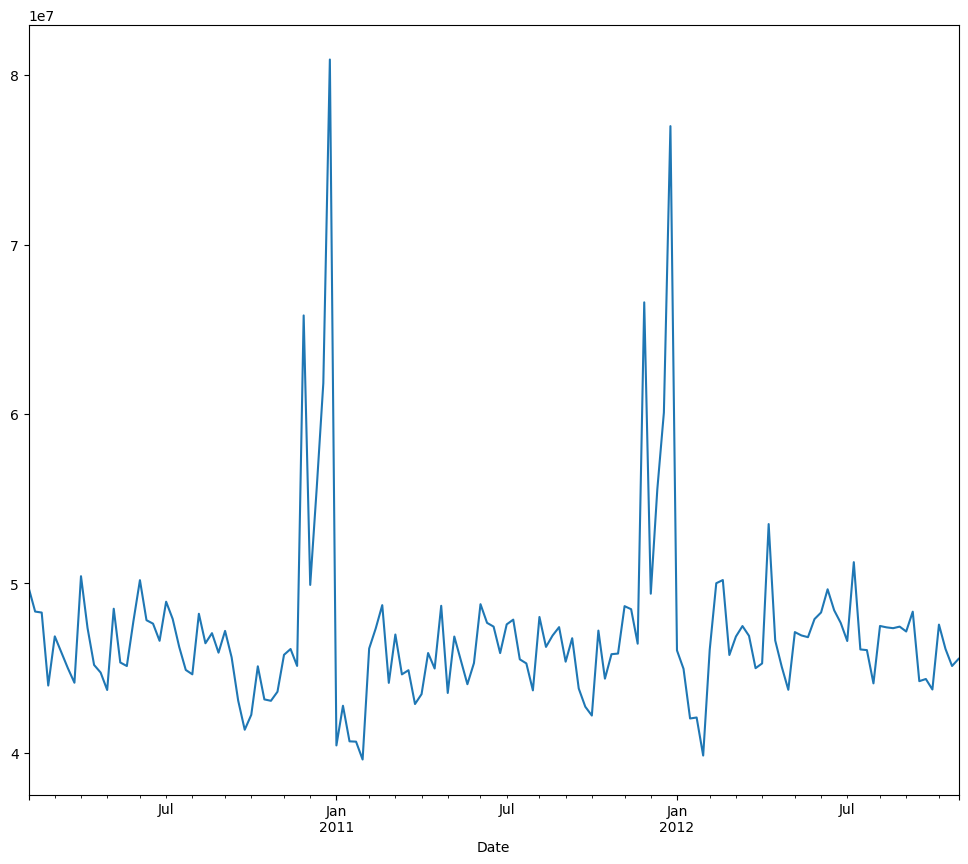

In [ ]:
df_weekly.plot()

In [ ]:
y_train = df_weekly[:110]
y_test = df_weekly[110:]

In [ ]:
import matplotlib.pyplot as plt

# ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  110
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1863.454
Date:                Fri, 29 Mar 2024   AIC                           3734.908
Time:                        23:35:07   BIC                           3745.637
Sample:                    02-07-2010   HQIC                          3739.258
                         - 03-11-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1972      0.053     -3.751      0.000      -0.300      -0.094
ar.L2         -0.0936      0.059     -1.589      0.112      -0.209       0.022
ma.L1         -1.0000      0.067    -14.834      0.0

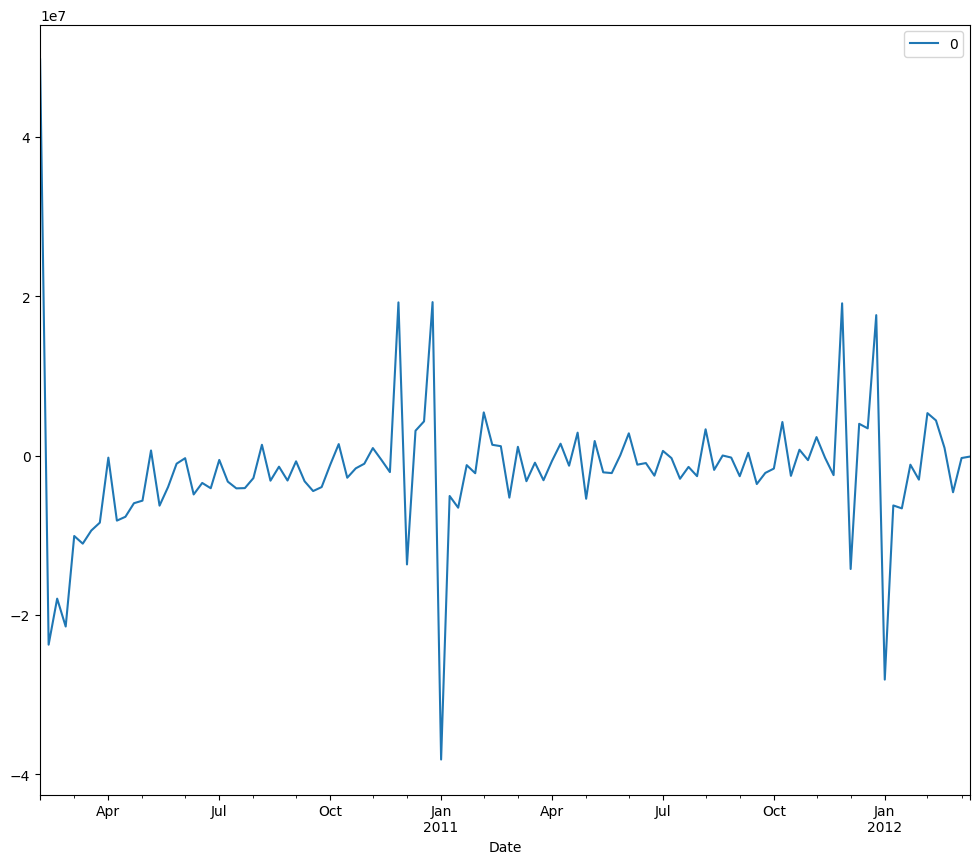

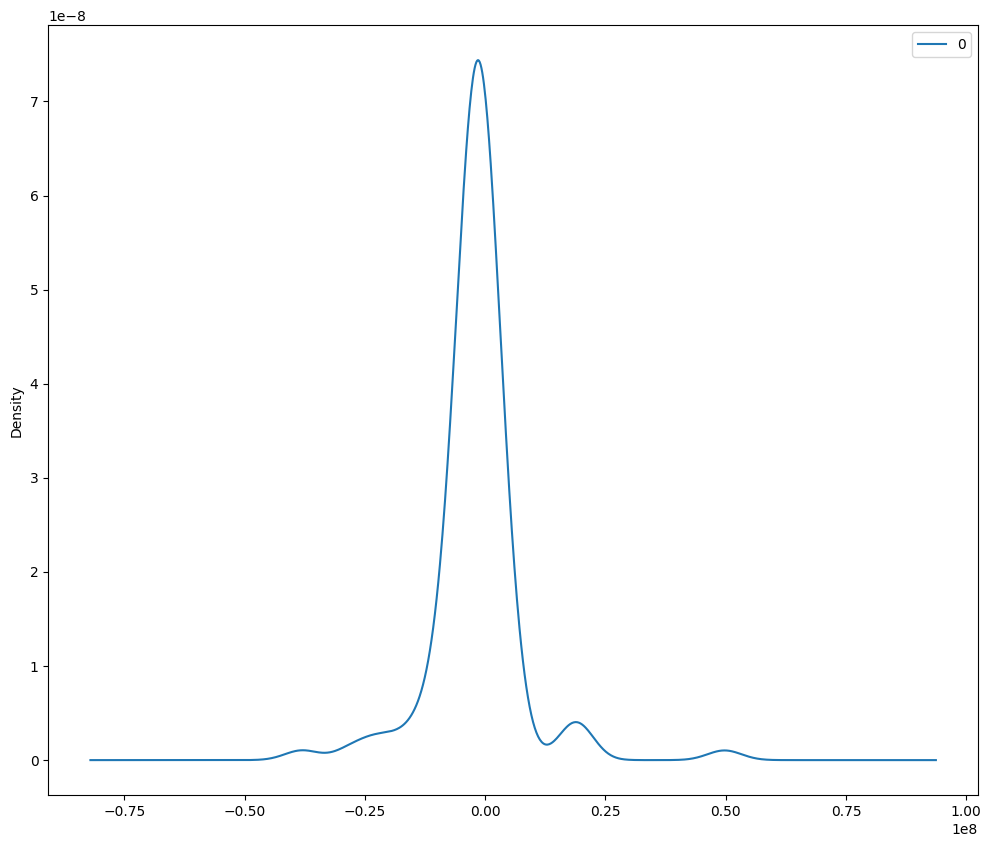

              0
count       110
mean   -1777096
std     9029190
min   -38129722
25%    -4022747
50%    -1483485
75%      653451
max    49750740


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Resources used: https://www.kaggle.com/code/abdallatamer/time-series-modeling

model = sm.tsa.arima.ARIMA(y_train , order = (2,2,1))
model1 = model.fit()
print(model1.summary())

res = pd.DataFrame(model1.resid)
res.plot()
plt.show()

res.plot(kind = 'kde')
plt.show()
print(res.describe())

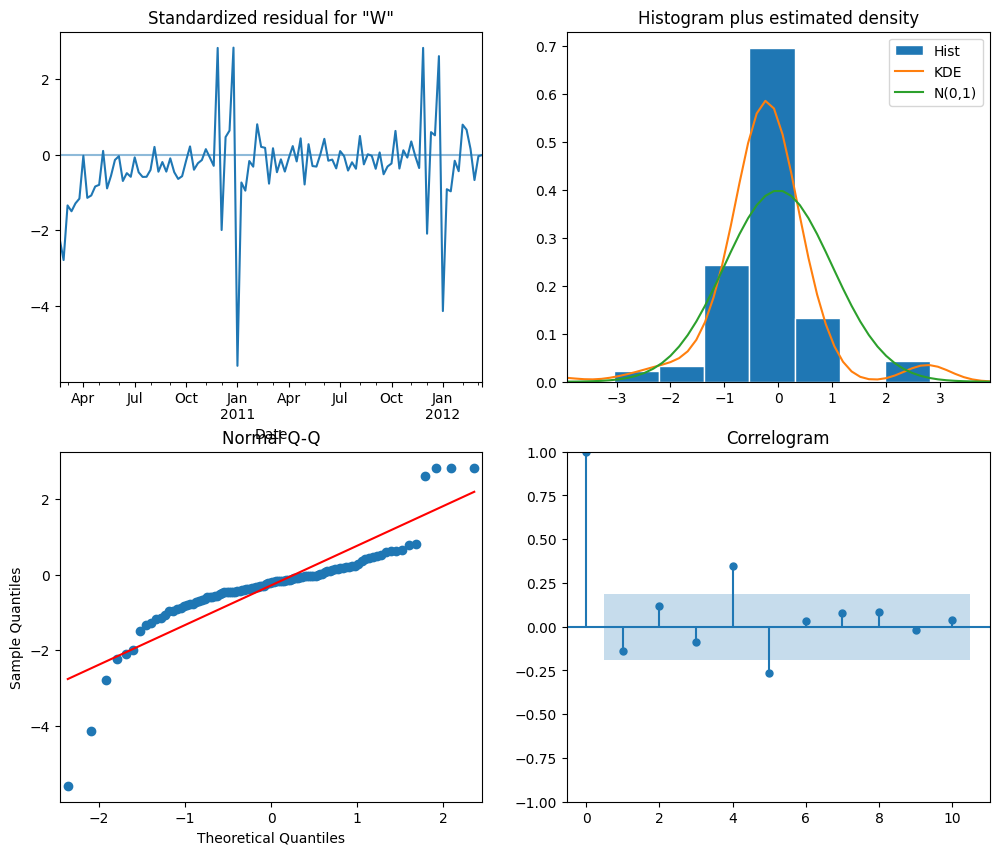

In [ ]:
model1.plot_diagnostics()
plt.show()

In [ ]:
!pip install pmdarima

# Auto-ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df_weekly, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=8,
                      d=1,
                      seasonal=True,
                      start_P=0,
                      D=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())
print("AIC value : ",model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[8]             : AIC=4605.627, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=4670.045, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=4623.886, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=4603.756, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[8]             : AIC=4648.338, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[8]             : AIC=4604.451, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[8]             : AIC=4604.467, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[8]             : AIC=4621.481, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[8]             : AIC=4606.450, Time=0.58 sec
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=4618.577, Time=0.14 sec
 ARIMA(0,1,2)(0,1,1)[8]             : AIC=4609.665, Time=0.32 sec
 ARIMA(1,1,0)(0,1,1)[8]             : AIC=4606.640, Time=0.23 sec
 ARIMA(1,1,2)(0,1,1)[8]             : AIC=4608.795, Time=0.60 sec
 ARIMA(0,1,1)(0,1,1)[8] intercept   : AIC=4605.511, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,1,1)

In [ ]:
train = df_weekly.loc["2010-02-5":"2012-02-17"]
test = df_weekly.loc["2012-02-17":]

In [ ]:
model.fit(train)
future_forecast =model.predict(n_periods=1609)

<Axes: xlabel='Date'>

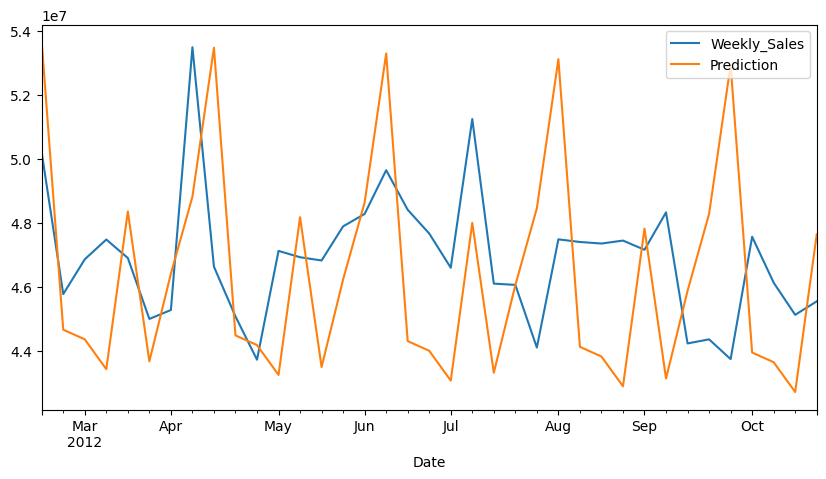

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(10,5))

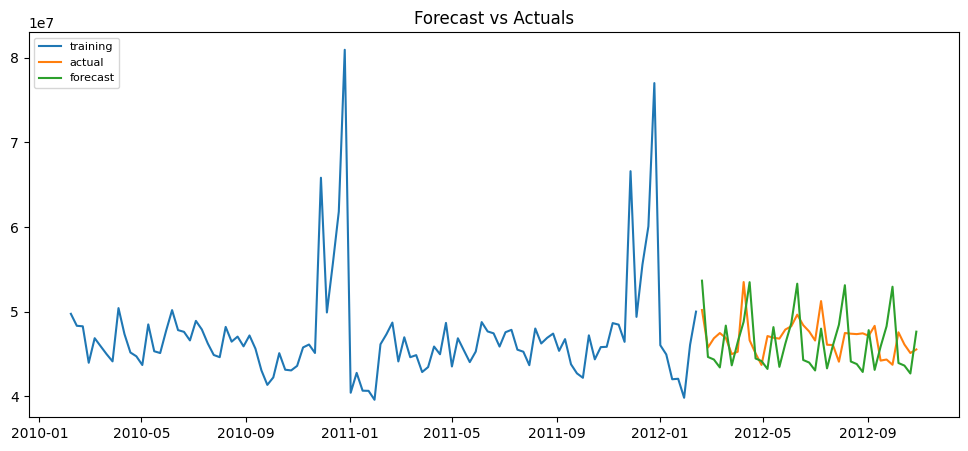

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(future_forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# LSTM Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import TimeSeriesSplit

# Put data in traditional x-y format for ML
df_lstm = df.drop(["Store"], axis = 1)
df_lstm.sort_values("Date", inplace = True)
#df_lstm.set_index("Date", inplace = True)
x = df_lstm.drop(["Weekly_Sales"], axis = 1)
y = df_lstm[["Date", "Weekly_Sales"]]

# Resource used for TimeSeriesSplit
# https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9

# split data into train-test
tss = TimeSeriesSplit(n_splits = 3)
for train_index, test_index in tss.split(x):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# the model itself doesn't like the Date feature
# but copies of the train-test splits will be kept for Date uses later
x_train = x_train.drop(["Date"], axis = 1)
x_test = x_test.drop(["Date"], axis = 1)
y_pres_train = y_train # preserve y_train data
y_train = y_train.drop(["Date"], axis = 1)
y_pres_test = y_test # preserve y_test data
y_test = y_test.drop(["Date"], axis = 1)

In [ ]:
# reshape the data first
x_train = np.asarray(x_train).astype('float32')
x_train = np.reshape(x_train, (x_train.shape[0],1,x_train.shape[1]))
x_test = np.asarray(x_test).astype('float32')
x_test = np.reshape(x_test, (x_test.shape[0],1,x_test.shape[1]))

In [ ]:
# create the model
n_features = 5
n_steps = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(len(x_train), input_shape = (x_train.shape[1],), activation='relu'))
opt = keras.optimizers.AdamW(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

In [ ]:
# fit the model
# takes 5 minutes to run
model.fit(x_train, y_train, epochs=200, verbose=0)

In [ ]:
# make predictions
y_pred = model.predict(x_test, verbose=0)

# put predictions in a format for comparing to test set
y_pred = y_pred.astype("float64")
pd.options.display.float_format = '{:.0f}'.format
df_pred = pd.DataFrame(y_pred)
df_pred = df_pred.iloc[:, 2]
df_pred = df_pred.to_frame()
df_pred = df_pred.rename(columns={2:"Weekly_Sales"})

In [ ]:
# create Weekly Sales sums for use in plotting and model evaluation
y_pres_test.reset_index(inplace = True)
df_pred["Date"] = y_pres_test["Date"]
df_pred_sum = df_pred.groupby("Date")[["Weekly_Sales"]].sum()
y_pres_test_sum = y_pres_test.groupby("Date")[["Weekly_Sales"]].sum()
y_pres_train_sum = y_pres_train.groupby("Date")[["Weekly_Sales"]].sum()

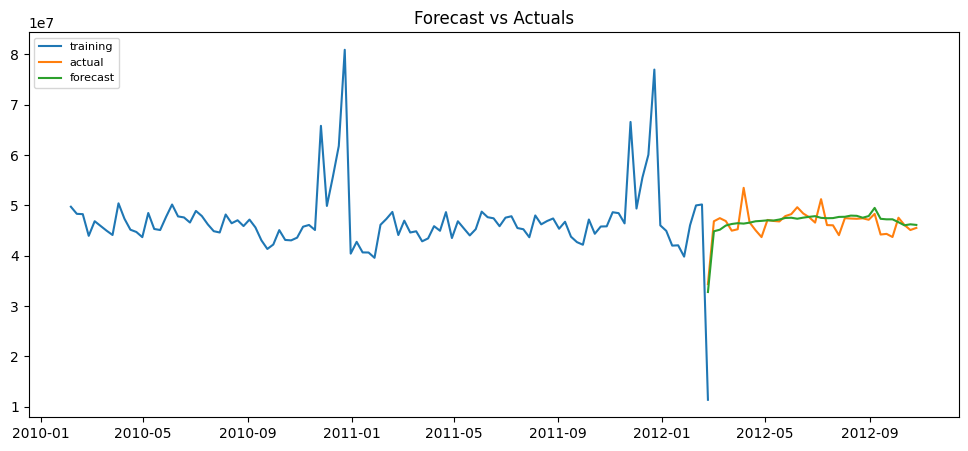

In [ ]:
# plot the model
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_pres_train_sum, label='training')
plt.plot(y_pres_test_sum, label='actual')
plt.plot(df_pred_sum, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# severe dip between train and test most likely due to loss of values at the split point
# doesn't appear to affect forecast accuracy

## Statistical Accuracy Evaluation and Model Choice

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# chose to use mape because it is scale-independent
mape_auto_arima = mean_absolute_percentage_error(test.iloc[:37], future_forecast)
mape_lstm = mean_absolute_percentage_error(y_pres_test_sum, df_pred_sum)

print("MAPE for Auto ARIMA:", round(mape_auto_arima, 4))
print("MAPE for LSTM:", round(mape_lstm, 4))

MAPE for Auto ARIMA: 0.0643
MAPE for LSTM: 0.0319


### **Description:**

In our time series analysis of the weekly sales data, we made several decisions to build a robust forecasting model that aligns with the data characteristics and our analytical goals:

1. **Weekly Aggregation**: Given that daily sales data can be noisy with many fluctuations, we decided to resample the data to a weekly frequency. This helps to smooth out the daily variability and reveals more of the underlying weekly trends and patterns, which are more relevant for strategic business planning.

2. **ARIMA Model Selection**: We chose an ARIMA(2,2,1) model after a careful consideration of the autocorrelation and partial autocorrelation plots. These plots suggested that our time series had significant autoregressive and moving average components, which are captured by the `p` and `q` parameters, respectively. The double differencing (`d=2`) was necessary to achieve stationarity in the presence of a non-linear trend.

3. **Residual Analysis**: We conducted a residual analysis to ensure that our models' assumptions were valid. The residuals displayed no evident patterns (indicating good model fit) and were approximately normally distributed, satisfying key assumptions for reliable forecasting.

4. **Model Diagnostics**: The diagnostic plots confirmed that the model did not violate the assumptions of homoscedasticity (equal variance of residuals) and no autocorrelation in the residuals.

5. **Automatic Model Selection with `auto_arima`**: To further validate our manual model selection, we utilized `auto_arima` from the `pmdarima` library. This method automated the process of identifying the optimal parameters by testing various combinations and selected the best model based on the lowest AIC value.

6. **LSTM Model Selection**: We also chose to use an LSTM model in addition to the ARIMA model for comparison. This decision was made because, regardless of the qualities of the time series, there was a significant amount of data available for training the model. Though LSTM has other paramters to consider, it does not require the `(p, q, d)` parameteres necessary for the ARIMA model. This made constructing the model initially easier.

7. **Final Model and Forecast**: The best ARIMA model (the automated ARIMA) and the LSTM model were used to project future sales for the test period of the data as a way to visualize the fit of the model. These models were also compared with MAPE scores. MAPE was specifically chosen as the evaluation metric for our models because it is scale-independent. Though both models shared the same scale, this extra precaution was taken to ensure correct metric comparison. Through the MAPE scores and visualization of the projected values, it was found that the LSTM model fitted the data the best.

8. **Forecast Plotting**: As discussed above, forecast plotting was also used as part of the evaluation process for visual observation of the fit of the models. In both plots for the automatic ARIMA and LSTM, training data, testing data, and projected values were plotted together to provide the visualization of the models' performances.

Each decision in our modeling process was backed by both statistical reasoning and practical consideration for the data's attributes. Our approach ensured that the final model was not only statistically sound but also capable of providing actionable insights for business decision-making.

## **Team Contributions:**

---



In our time series analysis project, the contributions of the team members are as follows:

**Mayur** played a pivotal role by conducting the initial time series analysis. His work included the crucial task of decomposing the time series to identify underlying trends, seasonality, and irregular components. Mayur also took charge of creating visual representations of our data, crafting a series of time series visualizations that were essential for our initial exploratory data analysis and subsequent presentations to the team.

**Zeel** was instrumental in developing the predictive modeling aspect of our project. He built both the ARIMA and AUTO ARIMA models, fine-tuning the parameters and ensuring that the models were well-suited to our dataset. Zeel also contributed significantly to the Time Series Description, offering clear and insightful interpretations of the models' outputs. Furthermore, He provided invaluable assistance in articulating the description of the models, helping to communicate complex concepts in an accessible manner.

**Kaitlin** focused on advanced modeling techniques and performance evaluation. She developed an LSTM (Long Short-Term Memory) model to capture the deeper patterns in our time series data, an effort that extended our predictive capabilities beyond traditional statistical models. In addition to her modeling work, Kaitlin was responsible for assessing the statistical accuracy of our models. She calculated MAPE (Mean Absolute Percentage Error) scores for each model, providing a quantitative measure of our forecasts' accuracy. Kaitlin also contributed to the descriptive aspects of our project, helping to explain the nuances and implications of our models' results.

Each member's distinct contributions were integral to the project's success, combining thorough analysis, advanced modeling, and detailed evaluation to ensure comprehensive and accurate time series forecasting.